# Leah Prince

## Health Insurance Premiums

Per healthcare.gov, there are five factors that can affect a plan's montlhy premium, including location, age, tobacco use, plan category and whether the plan covers dependents. In addition, it is also noted that your health, medical history or gender can also have an impact on your health premium.

### Data Overview

The dataset used in this analysis was provided by Kaggle. It attempts to identify how certain attributes, such as bmi, age, smoker, number of children and regions affect insurance premium charges.

[US Health Insurance Dataset](https://www.kaggle.com/teertha/ushealthinsurancedataset)

#### Data Dictionary

BMI:
BMI stands for Body Mass Index. It combines a person's weight with their height. This type of screening can indicate if a person is underweight or overweight or have a healthy weight. If a person's BMI is outside of a healthy range, they may be at risk for health issues. Carrying too much weight can lead to health conditions such as, diabetes, high blood pressure and cardiovascular problems. However, if a person's weight is too low, it can increase risks of malnutrition, osteoporosis and anemia. Generally, people with a BMI of 30 or higher can expect to pay more each month for health insurance

Smoker: Insurnace companies are allowed to charge smokers up to 50% more for premiumns. This is because people who smoke are more likely to incur health issues in the future and pose a greater risk for health insurance companies.

Age: Premiums can be up to 3 times higher for older people than younger people.

Region: Where you live can also have a huge impact on premiums, due to differences in competition, as well as state and local rules and cost of living.

Children: Insurers can pay more for a plan that also covers dependents.

### Objectives

The objective of this project is to understand the affect of health insurance premiums, based on several influential factors, using K Means Clustering. K Means Clustering will group attributes based on their similarities to determine if people will receive low, medium or high premiums.

1. Exploratory Data Analysis (EDA)
2. Data Cleansing
3. Feature Engineering
4. K Means

## Import Libraries and Files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-deep')

#import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Check for Missing Values

In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Data Exploration

#### Relationships in Data by Sex

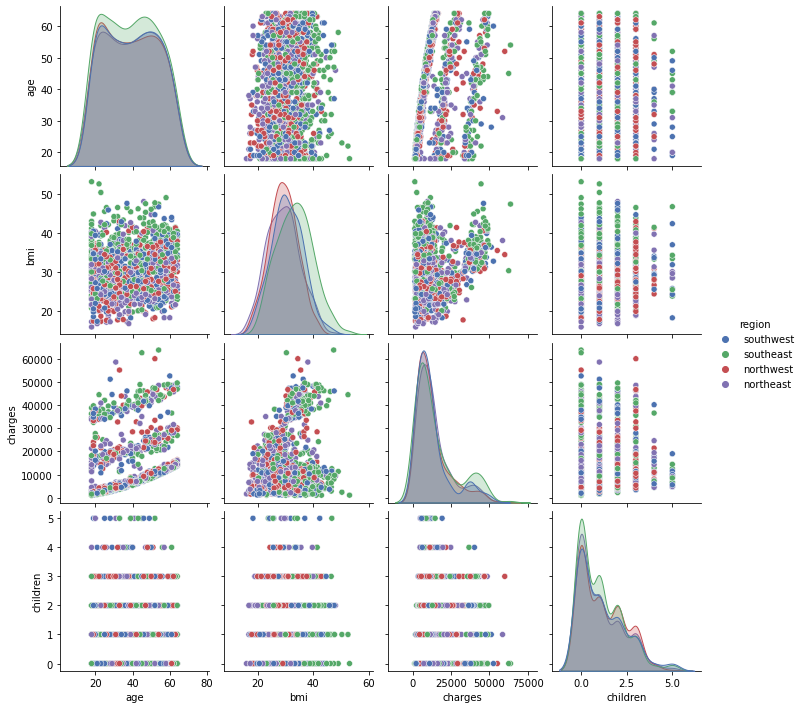

In [8]:
sns.pairplot(df, vars=['age', 'bmi','charges','children'], hue='region');

There are no visible correlations in the data. Also, the data is not normally distributed.

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

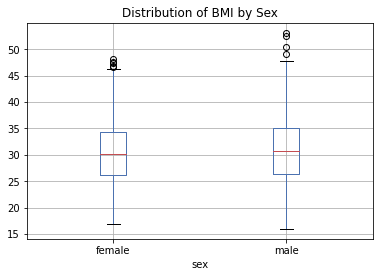

In [10]:
df.boxplot(column='bmi', by='sex');
plt.suptitle('');
plt.title('Distribution of BMI by Sex');

The comparable distribution between male and female bmi are pretty close in range.

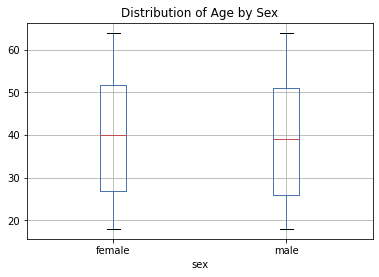

In [11]:
df.boxplot(column='age', by='sex')
plt.suptitle('');
plt.title('Distribution of Age by Sex');

Similarly with age, the comparable distribution between male and female are pretty close in range.

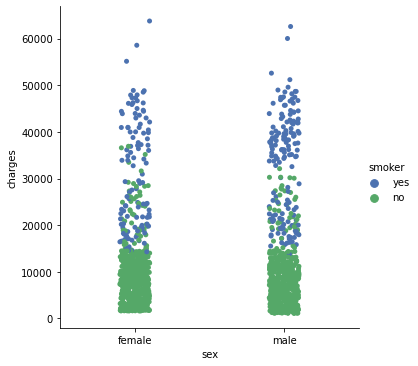

In [12]:
sns.catplot(x='sex', y='charges', data=df, hue='smoker');

There doesn't appear to be any biasness amongst charges by gender.

#### Smoker

In [13]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

There are alot less non-smokers, than smokers.

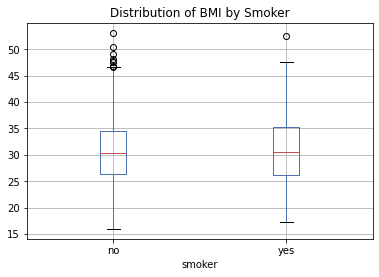

In [14]:
df.boxplot(column='bmi', by='smoker');
plt.suptitle('');
plt.title('Distribution of BMI by Smoker');

There doesn't appear to be a high bmi variance amongst smokers and non-smokers. Perhaps, smoking does not have an affect on bmi.

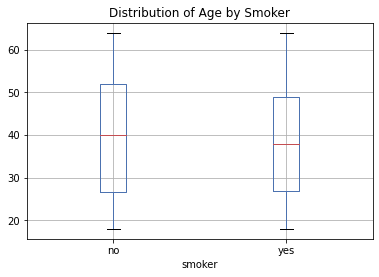

In [15]:
df.boxplot(column='age', by='smoker');
plt.suptitle('');
plt.title('Distribution of Age by Smoker');

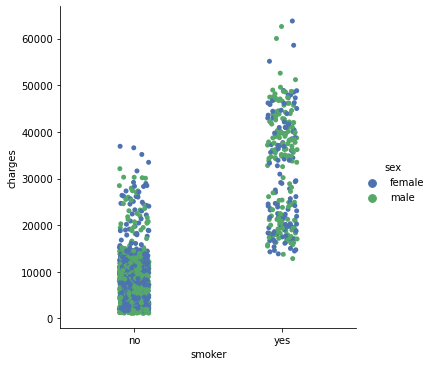

In [16]:
sns.catplot(x='smoker', y='charges', data=df, hue='sex', order=['no','yes']);

This visually clearly depicts that smokers have higher insurance premiums for both males and females.

#### Region

In [17]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [18]:
region = pd.crosstab(df.region, df.sex)
region

sex,female,male
region,,
northeast,161,163
northwest,164,161
southeast,175,189
southwest,162,163


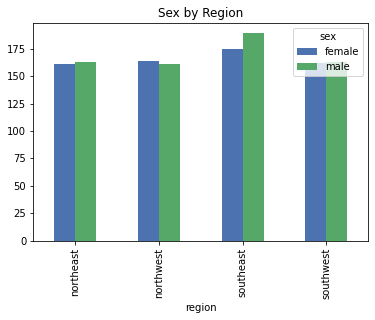

In [19]:
region.plot(kind='bar');
plt.title('Sex by Region');

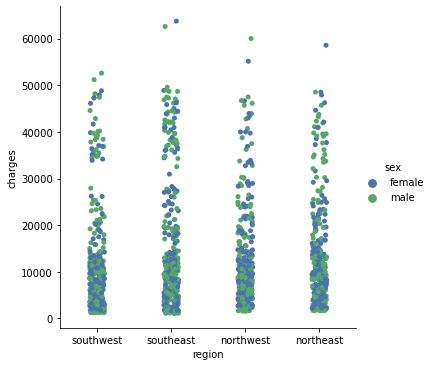

In [20]:
sns.catplot(x='region', y='charges', data=df, hue='sex');

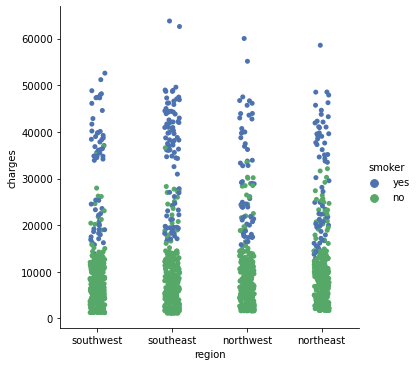

In [21]:
sns.catplot(x='region', y='charges', data=df, hue='smoker');

#### Age

In [22]:
df['age'].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

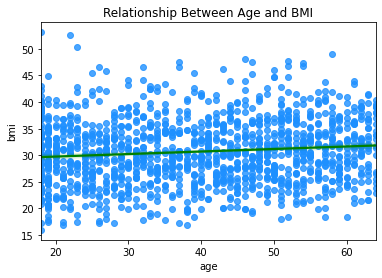

In [23]:
sns.regplot(x='age',y='bmi', data=df, scatter_kws={'color': "dodgerblue"}, line_kws={'color': 'green'})
plt.title('Relationship Between Age and BMI');

There's no relationship between age and bmi.

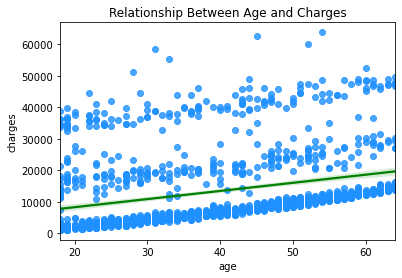

In [24]:
sns.regplot(x='age',y='charges', data=df, scatter_kws={'color': "dodgerblue"}, line_kws={'color': 'green'})
plt.title('Relationship Between Age and Charges');

There's no relationship between age and charges.

#### BMI

In [25]:
df['bmi'].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

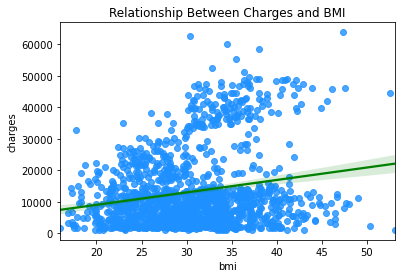

In [26]:
sns.regplot(x='bmi',y='charges', data=df, scatter_kws={'color': "dodgerblue"}, line_kws={'color': 'green'})
plt.title('Relationship Between Charges and BMI');

There's no relationship between bmi and charges.

#### Children

In [27]:
df['children'].describe()

count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

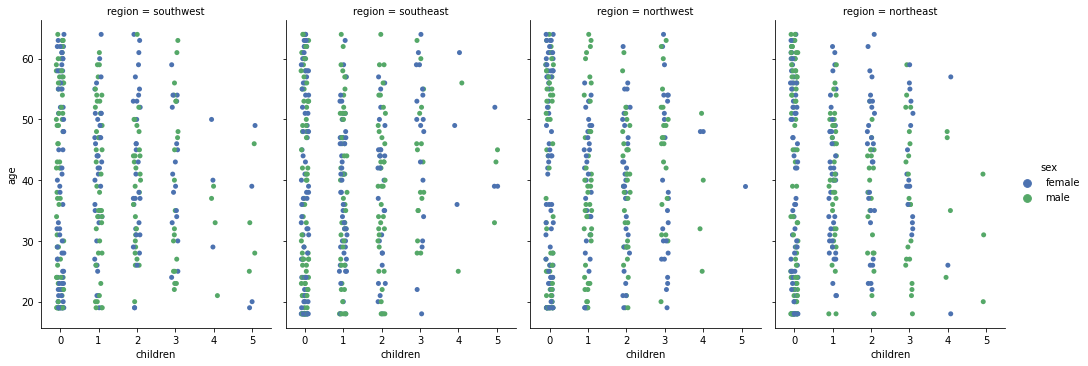

In [28]:
sns.catplot(x='children',y='age', hue='sex', col='region', aspect=.7, data=df);

#### Charges

In [29]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

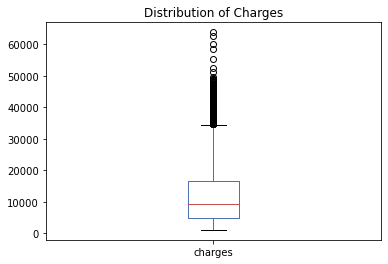

In [30]:
df['charges'].plot(kind='box');
plt.suptitle('');
plt.title('Distribution of Charges');

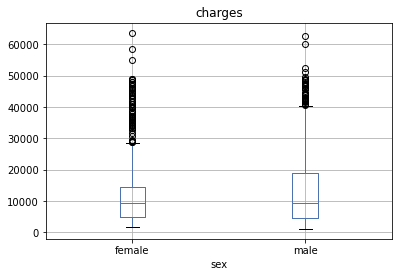

In [31]:
df.boxplot(column='charges', by='sex');
plt.suptitle('');

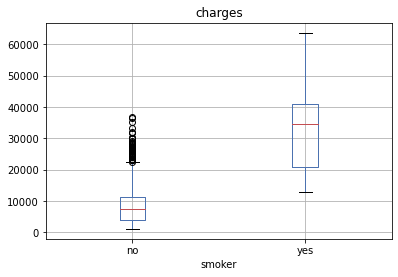

In [32]:
df.boxplot(column='charges', by='smoker');
plt.suptitle('');

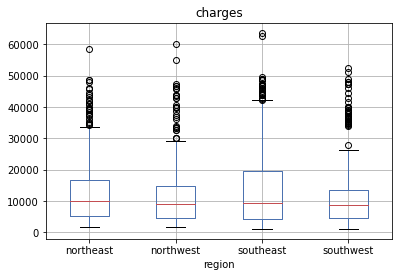

In [33]:
df.boxplot(column='charges', by='region');
plt.suptitle('');

## Check for Multicollinearity

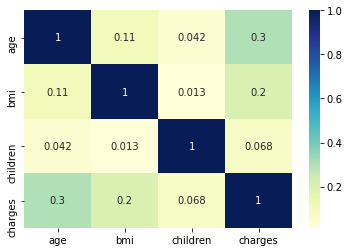

In [34]:
df_correlations = df.corr();
sns.heatmap(df_correlations, annot=True, cmap='YlGnBu');

## Model Assumptions

- K is the correct number of clusters
- Ensure the variance of the distribution of each variable is spherical
- Ensure all variables have the same variance
- Ensure each cluster has roughly the same number of observations

## K Means

#### Determine the optimal number of clusters using the elbow method.

In [35]:
from sklearn.cluster import KMeans

In [36]:
#the string variables are dropped since they don't work well with k means
X = df.drop(['sex','smoker','region'], axis=1)

In [37]:
#inertia evaluates how good the clusters are
cluster=[]

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(X)
    inertia = kmeans.inertia_
    cluster.append(inertia)
    print('The inertia for cluster ', i, 'is: ', inertia)

The inertia for cluster  1 is:  196074537157.16696
The inertia for cluster  2 is:  48015231283.2543
The inertia for cluster  3 is:  23005188168.18865
The inertia for cluster  4 is:  12124875846.071531
The inertia for cluster  5 is:  8540996536.504985
The inertia for cluster  6 is:  6166965649.964725


In [38]:
number_clusters = range(1,7)

Text(0.5, 1.0, 'Elbow Method')

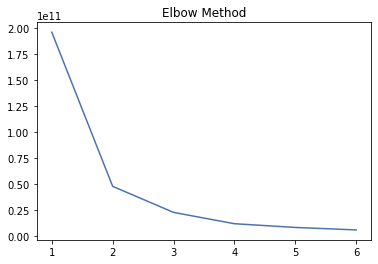

In [39]:
plt.plot(number_clusters,cluster)
plt.title('Elbow Method')

In [40]:
print('The inertia is: ', kmeans.inertia_)

The inertia is:  6166965649.964725


#### Create KMeans Cluster using the results from the elbow method.

In [41]:
#two clusters are created to group low and high premiums
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=1)
km.fit(X)

KMeans(n_clusters=2, random_state=1)

In [42]:
#review the cluster labels
km.labels_

array([1, 1, 1, ..., 1, 1, 0])

In [43]:
#save the cluster labels to the df
df['cluster'] = km.labels_
df.sort_values('cluster')

,age,sex,bmi,children,smoker,region,charges,cluster
668,62,male,32.015,0,yes,northeast,45710.20785,0
609,30,male,37.800,2,yes,southwest,39241.44200,0
607,59,female,23.655,0,yes,northwest,25678.77845,0
599,52,female,37.525,2,no,northwest,33471.97189,0
587,34,female,30.210,1,yes,northwest,43943.87610,0
...,...,...,...,...,...,...,...,...
583,32,female,23.650,1,no,southeast,17626.23951,1
582,39,male,45.430,2,no,southeast,6356.27070,1
581,19,male,30.590,0,no,northwest,1639.56310,1
132,53,female,35.900,2,no,southwest,11163.56800,1


In [44]:
#review the centers of the clusters
km.cluster_centers_

array([[4.27656904e+01, 3.27140586e+01, 1.16736402e+00, 3.58278558e+04],
       [3.84331210e+01, 3.02174386e+01, 1.07916288e+00, 8.36484755e+03]])

In [45]:
#save the centers of the clusters
centers = df.groupby('cluster').mean()
centers

,age,bmi,children,charges
cluster,,,,
0,42.765690,32.714059,1.167364,35827.855796
1,38.433121,30.217439,1.079163,8364.847548


In [46]:
#save the colors for the clusters (0:dodgerblue, 1:green)
colors = np.array(['dodgerblue', 'green'])

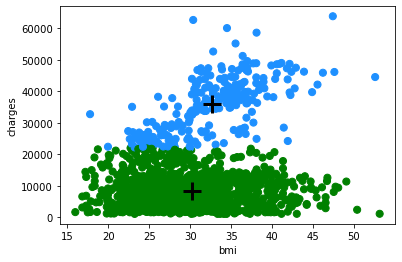

In [47]:
#create a scatter plot of the clusters
plt.scatter(df.bmi, df.charges, c=colors[df.cluster], s=50);

# Mark the centers of the clusters with "+"
plt.scatter(centers.bmi, centers.charges, linewidths=3, marker='+', s=300, c='black');


plt.xlabel('bmi');
plt.ylabel('charges');

Based on the clusters created for BMI and charges, the assumptions are violated and the clusters may not be reliable. There are outliers which make the variance unequal and the clusters vary in size. Also, the variance is not spherical.

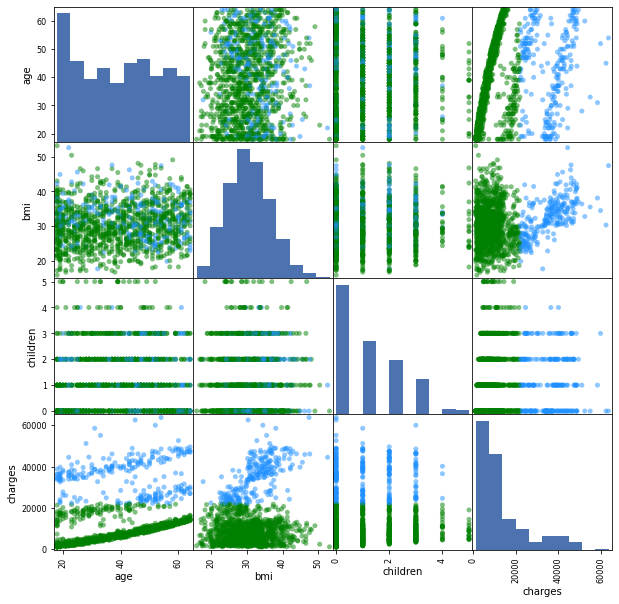

In [48]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(X, c=colors[df.cluster], figsize=(10,10), s=100);

Similar to the above findings, the assumptions are violated and the clusters may not be reliable. For example, looking at age and charges, as well as children and charges; the clusters are antisotropicly, meaning they are not spherical. 